<a href="https://colab.research.google.com/github/lsh4205/Infectious_Disease_Sim/blob/main/contagion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.1.Fixed points





> To find the fixed point of the system. We need to find when $Dx = 0$, with given $τ ≥ 0$ and $k > 0$.

\begin{align}
 -τ ⋅ S(t)⋅I(t) = 0
\end{align}

\begin{align}
τ ⋅ S(t) ⋅ I(t) - \frac{I(t)}{k} = 0
\end{align}

\begin{align}
\frac{I(t)}{k} = 0
\end{align}

> From the third equation, $I(t) = 0$, which can be replaced into the second equation. $τ ⋅ S(t) ⋅ I(t) - \frac{0}{k} = 0$. It means $S(t)$ can be any value in between $0$ to $1$. 

## 1.2. Implement a computer simulation.

> If the infection lasts $k$ days, then we might assume as an approximation that the rate of recovery is equal to the number infected divided by $k$.  Thus, on average, $1/k$ of the infected individuals recover each day.

> From textbook, the author let $τ$ be the proportion of encounters between an infected individual and a susceptible individual that transmit the infection.  Then the rate of new infections should increaseas any of the parameters $I$, $S$, or $τ$ increases, so we model this rate as $τ\cdot I(t)\cdot S(t)$.

> Let the initial conditions be $I(0) = 0.01$ (initial infected population
of 1%), $S(0) = 0.99$, and $R(0) = 0$.

> Run a simulation until $I(t) < 10^{−4}$, the “Stopping Condition” for this experiment. At what time t does this condition occur? Report your stopping time results to two digits after the decimal point.Create a plot that shows how $S(t)$, $I(t)$, and $R(t)$ vary in time. 

### 1.2.1. Code

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

# @param: Tau >= 0, how quickly the disease can spread
# @param: k > 0, how quickly an infected person recovers
def sir_plot(tau, k):
    # Define the SIR model equations
    # @return: dS/dt, dI/dt, dR/dt
    def sir_model(t, y):
        S, I, R = y
        dSdt = -tau * S * I
        dIdt = tau * S * I - I/k
        dRdt = I/k
        return [dSdt, dIdt, dRdt]

    # Define the event function to trigger the 'Stopping Condition'
    # which is I(t) < 10^(-4), I(t) = y[1]
    def event(t, y):
        return y[1] - 1e-4

    event.terminal = True

    # Set initial conditions, I(0) = 0.01 S(0) = 0.99, and R(0) = 0.
    y0 = [0.99, 0.01, 0]

    # Set time span for simulation
    t_span = np.linspace(0, 100, 101)

    # Run the simulation using solve_ivp and the event function
    soln = solve_ivp(fun=sir_model, t_span=[t_span[0], t_span[-1]], y0=y0, t_eval=t_span, events=event)

    # Print the time when the 'Stopping Condition' occurs
    stopping_time = soln.t_events[0][0]
    peaks_I, _ = find_peaks(soln.y[1], height=0)
    for i in peaks_I:
        print(f"Peaks in Infected group at {soln.t[i]} days with {soln.y[1,i] * 100:.2f}%.")
    print(f"Stopping time: {stopping_time:.2f}")

    # Plot the results
    plt.plot(soln.t, soln.y[0], label='S(t)')
    plt.plot(soln.t, soln.y[1], label='I(t)')
    plt.plot(soln.t, soln.y[2], label='R(t)')
    plt.xlabel('Time (days)')
    plt.title('SIR Model')
    plt.legend()
    plt.show()

#### 1.2.1.a) $τ = 0.8$ and $k = 4$.

Peaks in Infected group at 10.0 days with 32.69%.
Stopping time: 51.47


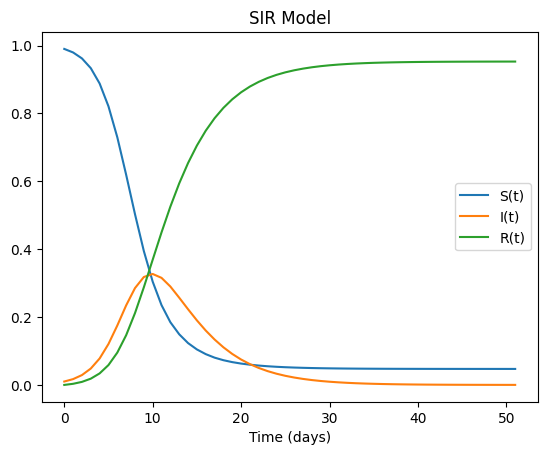

In [2]:
# When Tau = 0.8 and k = 4.
sir_plot(0.8, 4)